In [ ]:
#Dataframe and graph plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textwrap import wrap

#SK learn and metrics
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import model_selection
from patsy import dmatrices
import statsmodels.api as sm


# Import Dataset

First we will upload the data set and read it using `Pandas`.

In [ ]:
from google.colab import files 
uploaded = files.upload()

# please upload 'webdata_qtySold_byMonth.csv'

Saving webdata_qtySold_byMonth.csv to webdata_qtySold_byMonth.csv


In [ ]:
data = pd.read_csv('webdata_qtySold_byMonth.csv')
data

,Unnamed: 0,Date,Item Code,Qty Sold,Page,bom_type ID,BOM Type,Page Views,Organic Searches,New Users,Number of Sessions per User,Users,Weighted Avg Time on Page,Page Views_1M_ago,Organic Searches_1M_ago,New Users_1M_ago,Number of Sessions per User_1M_ago,Users_1M_ago,Weighted Avg Time on Page_1M_ago,Page Views_2M_ago,Organic Searches_2M_ago,New Users_2M_ago,Number of Sessions per User_2M_ago,Users_2M_ago,Weighted Avg Time on Page_2M_ago,Page Views_Current_and_Past_2_Months,Organic Searches_Current_and_Past_2_Months,New Users_Current_and_Past_2_Months,Number of Sessions per User_Current_and_Past_2_Months,Users_Current_and_Past_2_Months,Weighted Avg Time on Page_Current_and_Past_2_Months
0,0,2019-09-01,1013S-MTR,0.0,/systems/AS-1013S-MTR,2,BB,1.0,1.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.000000
1,1,2019-10-01,1013S-MTR,0.0,/systems/AS-1013S-MTR,2,BB,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.000000
2,2,2019-11-01,1013S-MTR,0.0,/systems/AS-1013S-MTR,2,BB,1.0,1.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,0.000000
3,3,2019-12-01,1013S-MTR,0.0,/systems/AS-1013S-MTR,2,BB,1.0,1.0,1.0,1.0,1.0,216.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,216.000000
4,4,2020-01-01,1013S-MTR,0.0,/systems/AS-1013S-MTR,2,BB,7.0,1.0,2.0,2.0,5.0,153.285714,1.0,1.0,1.0,1.0,1.0,216.0,1.0,1.0,1.0,1.0,1.0,0.0,9.0,3.0,4.0,4.0,7.0,369.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,1891,2021-04-01,SBI-4129P-C2N,0.0,/systems/SBI-4129P-C2N,5,Node,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1892,1892,2021-05-01,SBI-4129P-C2N,0.0,/systems/SBI-4129P-C2N,5,Node,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1893,1893,2021-06-01,SBI-4129P-C2N,0.0,/systems/SBI-4129P-C2N,5,Node,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1894,1894,2021-07-01,SBI-4129P-C2N,0.0,/systems/SBI-4129P-C2N,5,Node,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


Once the data is imported, we will drop the unwanted columns, so that the data only contain the X and Y variables needed for the model.

In [ ]:
data = data.drop(['Unnamed: 0', 'Date', 'Item Code','Page', 'bom_type ID', 'BOM Type'], axis = 1) # drop unwanted columns

data.columns = [c.replace(' ', '_') for c in data.columns] # replace ' ' and punctuations with '_' in column names as the white spaces will not work properly
data.columns = [c.replace('*', '_') for c in data.columns]
data.columns = [c.replace('.', '') for c in data.columns]

data

,Qty_Sold,Page_Views,Organic_Searches,New_Users,Number_of_Sessions_per_User,Users,Weighted_Avg_Time_on_Page,Page_Views_1M_ago,Organic_Searches_1M_ago,New_Users_1M_ago,Number_of_Sessions_per_User_1M_ago,Users_1M_ago,Weighted_Avg_Time_on_Page_1M_ago,Page_Views_2M_ago,Organic_Searches_2M_ago,New_Users_2M_ago,Number_of_Sessions_per_User_2M_ago,Users_2M_ago,Weighted_Avg_Time_on_Page_2M_ago,Page_Views_Current_and_Past_2_Months,Organic_Searches_Current_and_Past_2_Months,New_Users_Current_and_Past_2_Months,Number_of_Sessions_per_User_Current_and_Past_2_Months,Users_Current_and_Past_2_Months,Weighted_Avg_Time_on_Page_Current_and_Past_2_Months
0,0.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.000000
2,0.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,0.000000
3,0.0,1.0,1.0,1.0,1.0,1.0,216.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,216.000000
4,0.0,7.0,1.0,2.0,2.0,5.0,153.285714,1.0,1.0,1.0,1.0,1.0,216.0,1.0,1.0,1.0,1.0,1.0,0.0,9.0,3.0,4.0,4.0,7.0,369.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1892,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1893,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1894,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


Descriptive statistics for the dataset is shown below.

In [ ]:
data.describe()

,Qty_Sold,Page_Views,Organic_Searches,New_Users,Number_of_Sessions_per_User,Users,Weighted_Avg_Time_on_Page,Page_Views_1M_ago,Organic_Searches_1M_ago,New_Users_1M_ago,Number_of_Sessions_per_User_1M_ago,Users_1M_ago,Weighted_Avg_Time_on_Page_1M_ago,Page_Views_2M_ago,Organic_Searches_2M_ago,New_Users_2M_ago,Number_of_Sessions_per_User_2M_ago,Users_2M_ago,Weighted_Avg_Time_on_Page_2M_ago,Page_Views_Current_and_Past_2_Months,Organic_Searches_Current_and_Past_2_Months,New_Users_Current_and_Past_2_Months,Number_of_Sessions_per_User_Current_and_Past_2_Months,Users_Current_and_Past_2_Months,Weighted_Avg_Time_on_Page_Current_and_Past_2_Months
count,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000
mean,0.388186,2.894515,0.541139,0.675105,0.828162,2.122890,57.324320,2.746308,0.515295,0.637131,0.772624,2.011076,54.729434,2.643460,0.489451,0.607068,0.731572,1.919304,51.850962,8.284283,1.545886,1.919304,2.332358,6.053270,163.904716
std,1.694986,6.695129,1.450465,1.806448,1.778252,3.937665,143.914675,6.641160,1.434876,1.779144,1.708076,3.900799,142.471931,6.625169,1.411186,1.759747,1.666250,3.873641,139.857928,16.966236,3.714196,4.457756,4.527370,10.364635,262.411541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,38.553571
75%,0.000000,3.000000,0.000000,1.000000,1.000000,3.000000,40.083333,3.000000,0.000000,0.000000,1.000000,2.000000,35.357143,3.000000,0.000000,0.000000,1.000000,2.000000,29.611458,9.000000,1.000000,2.000000,2.000000,7.000000,229.187500
max,33.000000,99.000000,26.000000,27.000000,16.000000,40.000000,1527.500000,99.000000,26.000000,27.000000,12.500000,40.000000,1527.500000,99.000000,26.000000,27.000000,12.500000,40.000000,1527.500000,200.000000,45.000000,45.000000,30.000000,97.000000,1854.000000


# Data Expoloration

Now that the data is imported correctly, we will inspect the data set using various plots.

## Scatter Plots

Before fitting a linear regression model, we will check if there are any linear relationships between the dependent and independent variables. The code below will plot one scatter plot for each independent variable in our dataset, against the dependent variable `Qty Sold`.

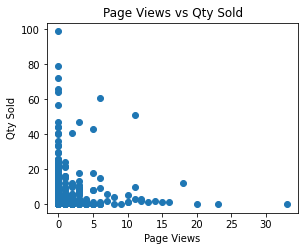

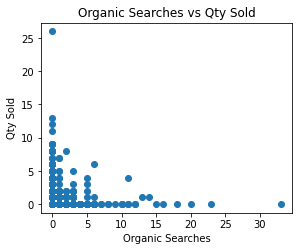

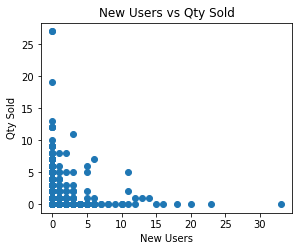

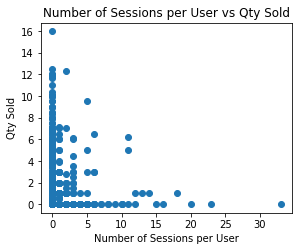

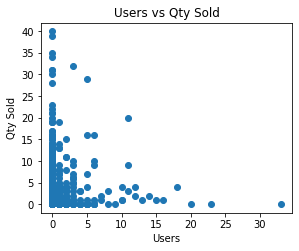

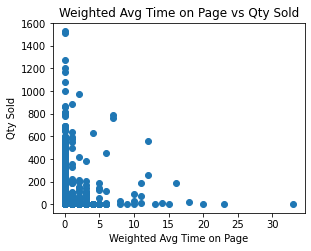

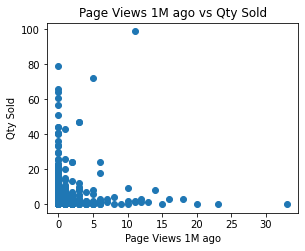

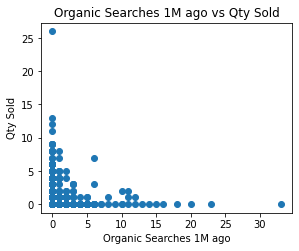

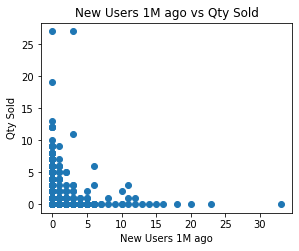

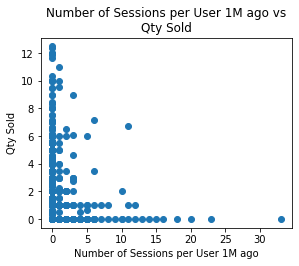

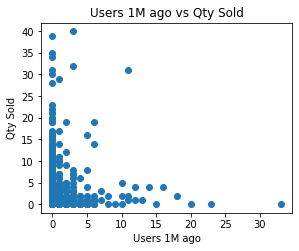

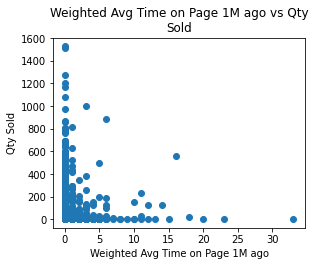

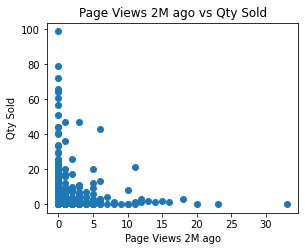

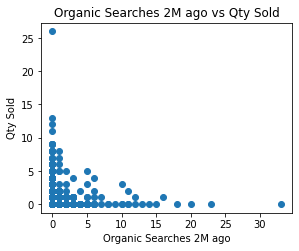

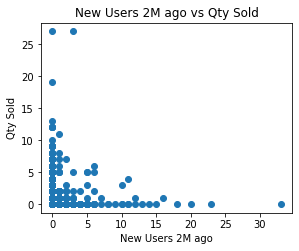

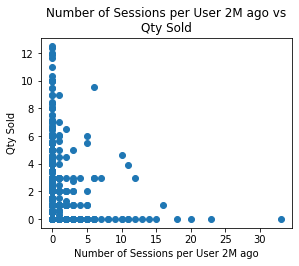

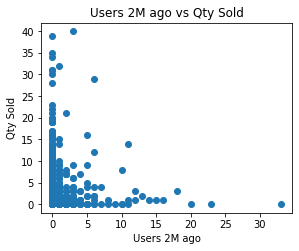

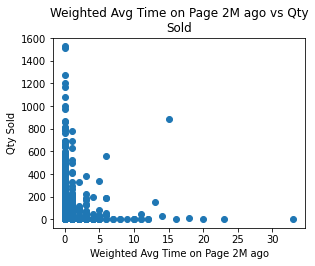

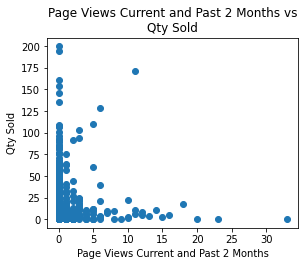

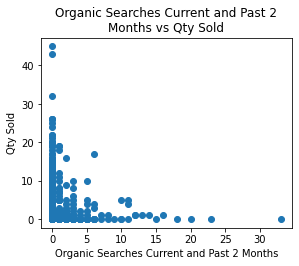

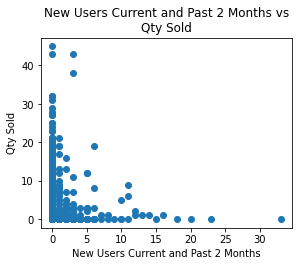

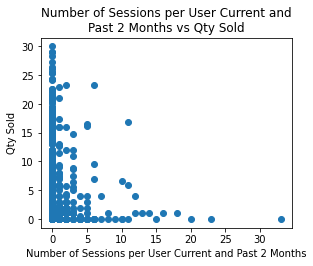

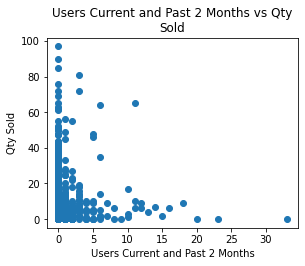

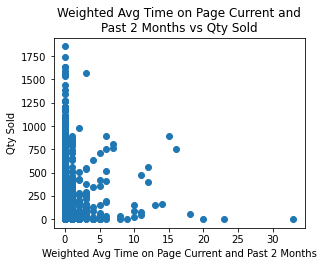

In [ ]:
y_col = "Qty_Sold"
X = data.iloc[:,1:] # create dataframe with X variables only
x_columns = X.columns


for x_col in x_columns:

    figure = plt.figure(figsize=(4.5, 3.5))
    ax = plt.gca()
    ax.scatter(data[y_col], data[x_col])
    ax.set_xlabel(x_col.replace("_", " "))
    ax.set_ylabel(y_col.replace("_", " "))
    ax.set_title('\n'.join(wrap("{} vs {}".format(x_col, y_col).replace("_", " "),40)))
    plt.show()
    #figure.savefig('Scatter plot of ' + x_col + ' vs Quantity Sold.png', bbox_inches='tight')

As we can see above, there are no linear relationships between any combination of the dependent and independent variables. Hence, a Linear Regression model is not recommended, but will be fitted anyway.

# Linear Regression

In [ ]:
data.columns

Index(['Qty_Sold', 'Page_Views', 'Organic_Searches', 'New_Users',
       'Number_of_Sessions_per_User', 'Users', 'Weighted_Avg_Time_on_Page',
       'Page_Views_1M_ago', 'Organic_Searches_1M_ago', 'New_Users_1M_ago',
       'Number_of_Sessions_per_User_1M_ago', 'Users_1M_ago',
       'Weighted_Avg_Time_on_Page_1M_ago', 'Page_Views_2M_ago',
       'Organic_Searches_2M_ago', 'New_Users_2M_ago',
       'Number_of_Sessions_per_User_2M_ago', 'Users_2M_ago',
       'Weighted_Avg_Time_on_Page_2M_ago',
       'Page_Views_Current_and_Past_2_Months',
       'Organic_Searches_Current_and_Past_2_Months',
       'New_Users_Current_and_Past_2_Months',
       'Number_of_Sessions_per_User_Current_and_Past_2_Months',
       'Users_Current_and_Past_2_Months',
       'Weighted_Avg_Time_on_Page_Current_and_Past_2_Months'],
      dtype='object')

In [ ]:
x_var = data[['Page_Views', 'Organic_Searches', 'New_Users',
       'Number_of_Sessions_per_User', 'Users', 'Weighted_Avg_Time_on_Page',
       'Page_Views_1M_ago', 'Organic_Searches_1M_ago', 'New_Users_1M_ago',
       'Number_of_Sessions_per_User_1M_ago', 'Users_1M_ago',
       'Weighted_Avg_Time_on_Page_1M_ago', 'Page_Views_2M_ago',
       'Organic_Searches_2M_ago', 'New_Users_2M_ago',
       'Number_of_Sessions_per_User_2M_ago', 'Users_2M_ago',
       'Weighted_Avg_Time_on_Page_2M_ago',
       'Page_Views_Current_and_Past_2_Months',
       'Organic_Searches_Current_and_Past_2_Months',
       'New_Users_Current_and_Past_2_Months',
       'Number_of_Sessions_per_User_Current_and_Past_2_Months',
       'Users_Current_and_Past_2_Months',
       'Weighted_Avg_Time_on_Page_Current_and_Past_2_Months']]
y_var = data['Qty_Sold']

mlr_model = sm.OLS(y_var, x_var)
mlr_reg = mlr_model.fit()

In [ ]:
mlr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Qty_Sold   R-squared (uncentered):                   0.037
Model:                            OLS   Adj. R-squared (uncentered):              0.028
Method:                 Least Squares   F-statistic:                              4.037
Date:                Sat, 23 Oct 2021   Prob (F-statistic):                    2.43e-08
Time:                        02:51:01   Log-Likelihood:                         -3702.8
No. Observations:                1896   AIC:                                      7442.
Df Residuals:                    1878   BIC:                                      7541.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Page_Views                                                0.0075      0.012      0.617      0.538      -0.016       0.031
Organic_Searches                                          0.0069      0.056      0.124      0.901      -0.103       0.117
New_Users                                                -0.0149      0.047     -0.314      0.753      -0.107       0.078
Number_of_Sessions_per_User                              -0.0002      0.043     -0.005      0.996      -0.084       0.084
Users                                                    -0.0010      0.029     -0.032      0.974      -0.059       0.057
Weighted_Avg_Time_on_Page                                 0.0002      0.000      1.040      0.298      -0.000       0.001
Page_Views_1M_ago                                         0.0317      0.013      2.523      0.012       0.007       0.056
Organic_Searches_1M_ago                                   0.0505      0.062      0.814      0.416      -0.071       0.172
New_Users_1M_ago                                         -0.0357      0.051     -0.703      0.482      -0.135       0.064
Number_of_Sessions_per_User_1M_ago                       -0.0854      0.047     -1.809      0.071      -0.178       0.007
Users_1M_ago                                             -0.0091      0.031     -0.293      0.770      -0.070       0.052
Weighted_Avg_Time_on_Page_1M_ago                       2.876e-05      0.000      0.117      0.907      -0.000       0.001
Page_Views_2M_ago                                        -0.0371      0.012     -2.990      0.003      -0.061      -0.013
Organic_Searches_2M_ago                                  -0.0604      0.059     -1.032      0.302      -0.175       0.054
New_Users_2M_ago                                          0.0347      0.048      0.716      0.474      -0.060       0.130
Number_of_Sessions_per_User_2M_ago                        0.0796      0.046      1.713      0.087      -0.012       0.171
Users_2M_ago                                              0.0261      0.030      0.877      0.381      -0.032       0.084
Weighted_Avg_Time_on_Page_2M_ago                       8.142e-05      0.000      0.334      0.738      -0.000       0.001
Page_Views_Current_and_Past_2_Months                      0.0021      0.006      0.372      0.710      -0.009       0.013
Organic_Searches_Current_and_Past_2_Months               -0.0030      0.025     -0.118      0.906      -0.053       0.047
New_Users_Current_and_Past_2_Months                      -0.0158      0.021     -0.747      0.455      -0.057       0.026
Number_of_Sessions_per_User_Current_and_Past_2_Months   

As we can see from the output above, there are a few variables that are statistically significant at $\alpha = 0.05$, namely: 

- Page Views (1 Month ago)
- Page Views (2 Months ago)
- Weighted Avg Time on Page (Current and past 2 months ago)

The $R^2$ tells us the goodness of fit of the model, which is equal to 0.037, which shows that the Multiple Linear Regression is not a good fit. 

### Correlogram & Using SK Learn (EXTRA)

We will use the Correlogram to see if there are any relationships between the descriptive features

In [ ]:
## THIS WILL TAKE A COUPLE OF MINUTES TO RUN

# X = data.iloc[:,1:]

# sns.pairplot(X, kind="reg")
# plt.show()

## SK LEARN

#x_var = data[['Page Views', 'Organic Searches', 'New Users', 'Avg. Time on Page','Number of Sessions per User', 'Users', 'avg*sum', 'Weighted Avg Time on Page', 'Page Views_1M_ago', 'Organic Searches_1M_ago', 'New Users_1M_ago', 'Avg. Time on Page_1M_ago', 'Number of Sessions per User_1M_ago',
#'Users_1M_ago', 'avg*sum_1M_ago', 'Weighted Avg Time on Page_1M_ago', 'Page Views_2M_ago', 'Organic Searches_2M_ago', 'New Users_2M_ago', 'Avg. Time on Page_2M_ago', 'Number of Sessions per User_2M_ago', 'Users_2M_ago', 'avg*sum_2M_ago', 'Weighted Avg Time on Page_2M_ago']]
# y_var = data['Qty Sold']
# X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.3, random_state = 999) # set random_state for reproducibility

# lr = sk.linear_model.LinearRegression()
# model = lr.fit(X_train, y_train)

# yhat = model.predict(X_test)
# print('R-Squared :', lr.score(X_test, y_test))

# Poisson Regression

First we will split the data into train-test sets.

Use this link: https://timeseriesreasoning.com/contents/poisson-regression-model/

In [ ]:
np.random.seed(0) # set random seed for reproducibility
mask = np.random.rand(len(data)) < 0.8
data_train = data[mask]
data_test = data[~mask]
print('Training data set length='+str(len(data_train)))
print('Testing data set length='+str(len(data_test)))

Training data set length=1487
Testing data set length=409


In [ ]:
data_train

,Qty_Sold,Page_Views,Organic_Searches,New_Users,Number_of_Sessions_per_User,Users,Weighted_Avg_Time_on_Page,Page_Views_1M_ago,Organic_Searches_1M_ago,New_Users_1M_ago,Number_of_Sessions_per_User_1M_ago,Users_1M_ago,Weighted_Avg_Time_on_Page_1M_ago,Page_Views_2M_ago,Organic_Searches_2M_ago,New_Users_2M_ago,Number_of_Sessions_per_User_2M_ago,Users_2M_ago,Weighted_Avg_Time_on_Page_2M_ago,Page_Views_Current_and_Past_2_Months,Organic_Searches_Current_and_Past_2_Months,New_Users_Current_and_Past_2_Months,Number_of_Sessions_per_User_Current_and_Past_2_Months,Users_Current_and_Past_2_Months,Weighted_Avg_Time_on_Page_Current_and_Past_2_Months
0,0.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.000000
2,0.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,0.000000
3,0.0,1.0,1.0,1.0,1.0,1.0,216.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,216.000000
4,0.0,7.0,1.0,2.0,2.0,5.0,153.285714,1.0,1.0,1.0,1.0,1.0,216.0,1.0,1.0,1.0,1.0,1.0,0.0,9.0,3.0,4.0,4.0,7.0,369.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1891,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1893,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1894,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


Now to set up the modelling step, we will define the X variables and Y variable of our model defined as `expr`. 

Two models will be fitted: 

1. The first model will have the web metrics from current month, 1 month ago and 2 months ago as **separate columns**.

2. The second model will use 6 engineered features - which are the sum of the individual web metrics from all 3 months in **one column**.

In [ ]:
data_train.columns

Index(['Qty_Sold', 'Page_Views', 'Organic_Searches', 'New_Users',
       'Number_of_Sessions_per_User', 'Users', 'Weighted_Avg_Time_on_Page',
       'Page_Views_1M_ago', 'Organic_Searches_1M_ago', 'New_Users_1M_ago',
       'Number_of_Sessions_per_User_1M_ago', 'Users_1M_ago',
       'Weighted_Avg_Time_on_Page_1M_ago', 'Page_Views_2M_ago',
       'Organic_Searches_2M_ago', 'New_Users_2M_ago',
       'Number_of_Sessions_per_User_2M_ago', 'Users_2M_ago',
       'Weighted_Avg_Time_on_Page_2M_ago',
       'Page_Views_Current_and_Past_2_Months',
       'Organic_Searches_Current_and_Past_2_Months',
       'New_Users_Current_and_Past_2_Months',
       'Number_of_Sessions_per_User_Current_and_Past_2_Months',
       'Users_Current_and_Past_2_Months',
       'Weighted_Avg_Time_on_Page_Current_and_Past_2_Months'],
      dtype='object')

In [ ]:
# expr = """Qty_Sold ~ Page_Views + Organic_Searches + New_Users +
# Number_of_Sessions_per_User + Users + Weighted_Avg_Time_on_Page +
# Page_Views_1M_ago + Organic_Searches_1M_ago + New_Users_1M_ago +
# Number_of_Sessions_per_User_1M_ago + Users_1M_ago +
# Weighted_Avg_Time_on_Page_1M_ago + Page_Views_2M_ago +
# Organic_Searches_2M_ago + New_Users_2M_ago +
# Number_of_Sessions_per_User_2M_ago + Users_2M_ago +
# Weighted_Avg_Time_on_Page_2M_ago + Page_Views_Current_and_Past_2_Months + 
# Organic_Searches_Current_and_Past_2_Months + New_Users_Current_and_Past_2_Months + 
# Number_of_Sessions_per_User_Current_and_Past_2_Months +
# Users_Current_and_Past_2_Months + Weighted_Avg_Time_on_Page_Current_and_Past_2_Months"""

## Poisson Regression with Web Metrics - Current Month, 1 Month Ago and 2 Months Ago - As Separate Columns

The first poisson regression model we will try fitting will include the web metrics all as separate descriptive features.

In [ ]:
expr = """Qty_Sold ~ Page_Views + Organic_Searches + New_Users +
Number_of_Sessions_per_User + Users + Weighted_Avg_Time_on_Page +
Page_Views_1M_ago + Organic_Searches_1M_ago + New_Users_1M_ago +
Number_of_Sessions_per_User_1M_ago + Users_1M_ago +
Weighted_Avg_Time_on_Page_1M_ago + Page_Views_2M_ago +
Organic_Searches_2M_ago + New_Users_2M_ago +
Number_of_Sessions_per_User_2M_ago + Users_2M_ago +
Weighted_Avg_Time_on_Page_2M_ago"""

y_train, X_train = dmatrices(expr, data_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, data_test, return_type='dataframe')

poisson_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit() # Fit the model

print(poisson_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Qty_Sold   No. Observations:                 1487
Model:                            GLM   Df Residuals:                     1468
Model Family:                 Poisson   Df Model:                           18
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1679.0
Date:                Sat, 23 Oct 2021   Deviance:                       2822.2
Time:                        02:51:02   Pearson chi2:                 1.08e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

As we can see from the output above, there are a independebt variables that have statistically significant coefficients at $\alpha = 0.05$, namely: 

- The Intercept
- Page Views
- Weighted Average Time on Page
- Page Views (1 Month Ago)
- Number of Sessions per User (1 Month Ago)
- Weighted Average Time on Page (1 Month Ago)
- Page Views (2 Months Ago)
- Organic Searches (2 Months Ago)
- Number of Sessions per User (2 Months Ago)
- Users (2 Months Ago)

Now we will iteratively remove the insignificant X variables from the model before using the trained model and predict the Quantity Sold in the test dataset. To evaluate the goodness of fit, we will also plot the predicted values against the actual values.

In [ ]:
expr = """Qty_Sold ~ Page_Views +  Weighted_Avg_Time_on_Page +
Page_Views_1M_ago + Number_of_Sessions_per_User_1M_ago + Weighted_Avg_Time_on_Page_1M_ago + 
Page_Views_2M_ago + Organic_Searches_2M_ago + Number_of_Sessions_per_User_2M_ago + Users_2M_ago"""

y_train, X_train = dmatrices(expr, data_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, data_test, return_type='dataframe')

poisson_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit() # Fit the model

print(poisson_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Qty_Sold   No. Observations:                 1487
Model:                            GLM   Df Residuals:                     1477
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1683.1
Date:                Sat, 23 Oct 2021   Deviance:                       2830.6
Time:                        02:51:02   Pearson chi2:                 1.10e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

As we can see from the output above, there are no more insignificant X variables in the model.

From the two plots below, the model is not a very good fit as the predicted counts are quite far off the actual counts. Hence, we can conclude that there are no relationship between the Web Metrics and Quantity Sold for DiGiCOR.

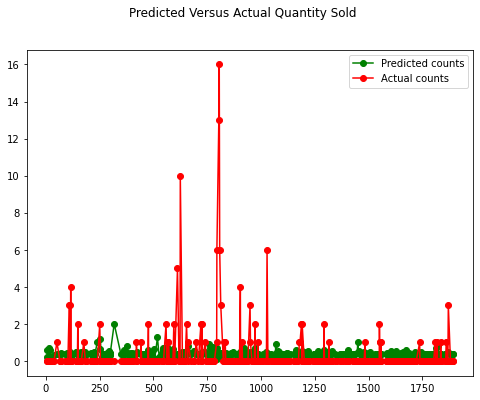

In [ ]:
poisson_predictions = poisson_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()

predicted_counts = predictions_summary_frame['mean']
actual_counts = y_test['Qty_Sold']
fig = plt.figure(figsize=(8, 6)) # Control plot size (length, height)
fig.suptitle('Predicted Versus Actual Quantity Sold')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()
#fig.savefig('Predicted versus actual Qty Sold.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

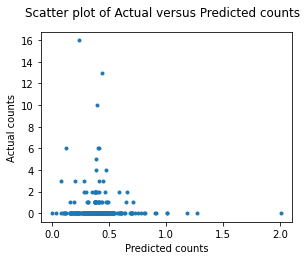

In [ ]:
plt.clf()
fig = plt.figure(figsize=(4.5, 3.5)) # Control plot size (length, height)
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()
#fig.savefig('Scatter plot of Actual versus Predicted counts.png', bbox_inches='tight')

## Poisson Regression with Web Metrics - Current Month, 1 Month Ago and 2 Months Ago - As One Column 

Next, we will try creating a poisson model with the current and past 2 months summed in one column.

In [ ]:
expr = """Qty_Sold ~ Page_Views_Current_and_Past_2_Months + 
Organic_Searches_Current_and_Past_2_Months + 
New_Users_Current_and_Past_2_Months + 
Number_of_Sessions_per_User_Current_and_Past_2_Months + 
Users_Current_and_Past_2_Months + 
Weighted_Avg_Time_on_Page_Current_and_Past_2_Months"""

# The Intercept
# Page Views
# Page Views (1 Month Ago)
# Number of Sessions per User (1 Month Ago)

y_train, X_train = dmatrices(expr, data_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, data_test, return_type='dataframe')

poisson_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit() # Fit the model

print(poisson_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Qty_Sold   No. Observations:                 1487
Model:                            GLM   Df Residuals:                     1480
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1720.0
Date:                Sat, 23 Oct 2021   Deviance:                       2904.3
Time:                        02:51:02   Pearson chi2:                 1.14e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

Similar to the previous modelling process, we will iteratively remove insignificant variables.

In [ ]:
expr = """Qty_Sold ~ Page_Views_Current_and_Past_2_Months +  
Number_of_Sessions_per_User_Current_and_Past_2_Months"""

y_train, X_train = dmatrices(expr, data_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, data_test, return_type='dataframe')

poisson_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit() # Fit the model

print(poisson_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Qty_Sold   No. Observations:                 1487
Model:                            GLM   Df Residuals:                     1484
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1721.2
Date:                Sat, 23 Oct 2021   Deviance:                       2906.6
Time:                        02:51:02   Pearson chi2:                 1.14e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

Now to plot the actual values vs the predicted values of our new model.

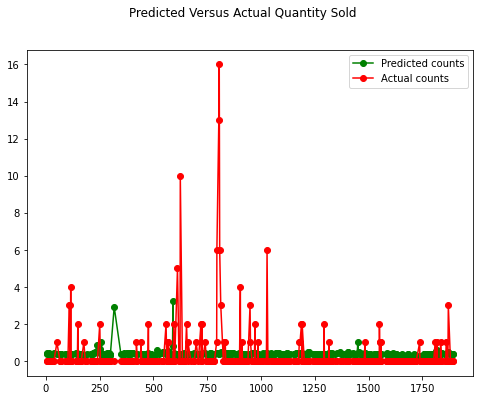

In [ ]:
poisson_predictions = poisson_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()

predicted_counts = predictions_summary_frame['mean']
actual_counts = y_test['Qty_Sold']
fig = plt.figure(figsize = (8,6)) # Control plot size (length, height)
fig.suptitle('Predicted Versus Actual Quantity Sold')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()
#fig.savefig('Predicted versus actual Qty Sold.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

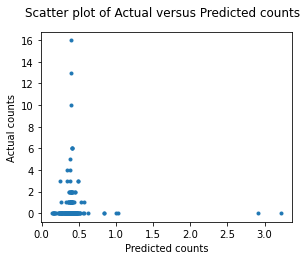

In [ ]:
plt.clf()
fig = plt.figure(figsize = (4.5, 3.5)) # Control plot size (length, height)
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()
#fig.savefig('Scatter plot of Actual versus Predicted counts.png', bbox_inches='tight')

As we can see in the two plots above, the new model did not do that much better than the first poisson regression model, which does not change our conclusion from the first model.

# Zero-Inflated Poisson Regression Model with Web Metrics - Current Month, 1 Month Ago and 2 Months Ago - As Separate Columns

Due to the high number of '0's for our Quantity Sold (Target Variable), it is expected that the simple Poisson Regression Model was not going to be a good fit. This can be seen in the histogram below, which shows the distribution of `Qty Sold`.

We will now try to fit a Zero-Inflated Poisson (ZIP) Regression model, which takes into account the high number of '0's in the target variable. Similar to the approach above, we will fit two models with ZIP.

Read more about the ZIP model here: https://towardsdatascience.com/an-illustrated-guide-to-the-zero-inflated-poisson-model-b22833343057

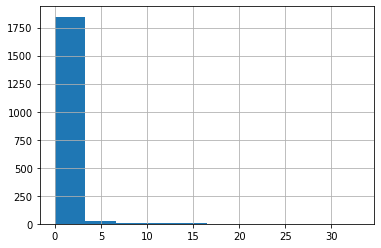

In [ ]:
data['Qty_Sold'].hist()

In [ ]:
expr = """Qty_Sold ~ Page_Views + Organic_Searches + New_Users +
Number_of_Sessions_per_User + Users + Weighted_Avg_Time_on_Page +
Page_Views_1M_ago + Organic_Searches_1M_ago + New_Users_1M_ago +
Number_of_Sessions_per_User_1M_ago + Users_1M_ago +
Weighted_Avg_Time_on_Page_1M_ago + Page_Views_2M_ago +
Organic_Searches_2M_ago + New_Users_2M_ago +
Number_of_Sessions_per_User_2M_ago + Users_2M_ago +
Weighted_Avg_Time_on_Page_2M_ago"""

y_train, X_train = dmatrices(expr, data_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, data_test, return_type='dataframe')

zip_training_results = sm.ZeroInflatedPoisson(endog=y_train, exog=X_train, exog_infl=X_train, inflation='logit').fit()

print(zip_training_results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1021: RuntimeWarning: overflow encountered in exp
  return -np.exp(XB) +  endog*XB - gammaln(endog+1)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1198: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + offset + exposure)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1199: RuntimeWarning: invalid value encountered in multiply
  return (self.endog - L)[:,None] * X
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:801: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred) # not cdf
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1021: RuntimeWarning: 

         Current function value: 2.866204
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 5
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                Qty_Sold   No. Observations:                 1487
Model:             ZeroInflatedPoisson   Df Residuals:                     1468
Method:                            MLE   Df Model:                           18
Date:                 Sat, 23 Oct 2021   Pseudo R-squ.:                  -2.671
Time:                         02:51:03   Log-Likelihood:                -4262.0
converged:                       False   LL-Null:                       -1160.9
Covariance Type:             nonrobust   LLR p-value:                     1.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
inflat

In the output above, the `inflate` variables represent variables that are useful for predicting if the target variable (Quantity Sold) are '0' or '>0'. In this case, we can see that all of them are insignificant, which tells us that the ZIP model is not an improvement to the first two model. This is further supported by the plot below.

<Figure size 432x288 with 0 Axes>

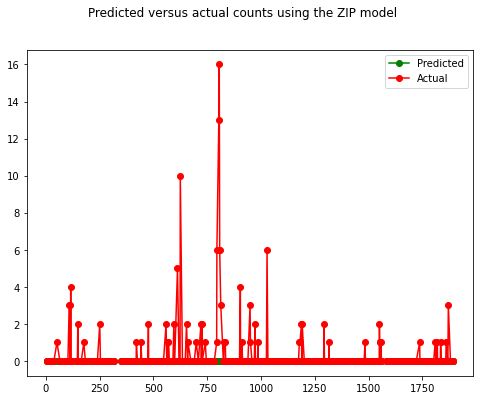

In [ ]:
zip_predictions = zip_training_results.predict(X_test,exog_infl=X_test)
predicted_counts=np.round(zip_predictions)
actual_counts = y_test['Qty_Sold']

fig = plt.figure()
fig = plt.figure(figsize = (8, 6)) # Control plot size (length, height)
fig.suptitle('Predicted versus actual counts using the ZIP model')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual')
plt.legend(handles=[predicted, actual])
plt.show()
#fig.savefig('ZIP Predicted versus actual Qty Sold.png', bbox_inches='tight')

# Zero-Inflated Poisson Regression Model with Web Metrics - Current Month, 1 Month Ago and 2 Months Ago - As One Column

In [ ]:
expr = """Qty_Sold ~ Page_Views_Current_and_Past_2_Months + 
Organic_Searches_Current_and_Past_2_Months + 
New_Users_Current_and_Past_2_Months + 
Number_of_Sessions_per_User_Current_and_Past_2_Months + 
Users_Current_and_Past_2_Months + 
Weighted_Avg_Time_on_Page_Current_and_Past_2_Months"""

# The Intercept
# Page Views
# Page Views (1 Month Ago)
# Number of Sessions per User (1 Month Ago)

y_train, X_train = dmatrices(expr, data_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, data_test, return_type='dataframe')

zip_training_results = sm.ZeroInflatedPoisson(endog=y_train, exog=X_train, exog_infl=X_train, inflation='logit').fit()

print(zip_training_results.summary())

         Current function value: 2.904240
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 5
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                Qty_Sold   No. Observations:                 1487
Model:             ZeroInflatedPoisson   Df Residuals:                     1480
Method:                            MLE   Df Model:                            6
Date:                 Sat, 23 Oct 2021   Pseudo R-squ.:                  -2.720
Time:                         02:51:04   Log-Likelihood:                -4318.6
converged:                       False   LL-Null:                       -1160.9
Covariance Type:             nonrobust   LLR p-value:                     1.000
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1021: RuntimeWarning: overflow encountered in exp
  return -np.exp(XB) +  endog*XB - gammaln(endog+1)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1198: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + offset + exposure)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1199: RuntimeWarning: overflow encountered in multiply
  return (self.endog - L)[:,None] * X
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1199: RuntimeWarning: invalid value encountered in multiply
  return (self.endog - L)[:,None] * X
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:801: RuntimeW

In the output above, We can see that `Weighted Average Time on Page` is a useful variable to predict if the Quantity Sold for a particular month will be 0 or >0. However, we can also see that there is only one significant variable (Inflated Weighted Avg Time on Page (Current_and_Past_2_Months)) for the ZIP model. Given that the R-Squared value is -2.720, we conclude that the model is a poor fit and there are no relationships between the Quantity Sold and the Web Metrics.

<Figure size 432x288 with 0 Axes>

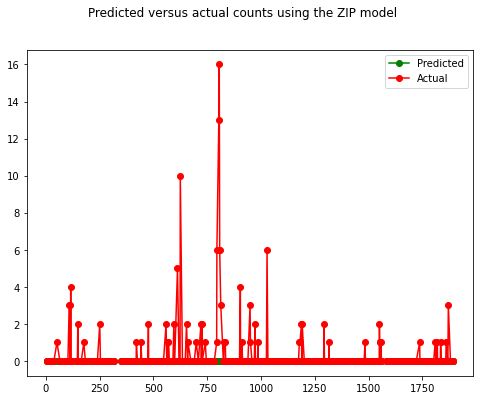

In [ ]:
zip_predictions = zip_training_results.predict(X_test,exog_infl=X_test)
predicted_counts=np.round(zip_predictions)
actual_counts = y_test['Qty_Sold']

fig = plt.figure()
fig = plt.figure(figsize = (8, 6)) # Control plot size (length, height)
fig.suptitle('Predicted versus actual counts using the ZIP model')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual')
plt.legend(handles=[predicted, actual])
plt.show()
#fig.savefig('ZIP2 Predicted versus actual Qty Sold.png', bbox_inches='tight')